**Assignment 2 Week 3**

In this assignment you’ll use sklearn to train and evaluate Lasso regression models on the data you downloaded. Recall that Lasso regression uses a linear model and mean square cost function with an L1 penalty and that the L1 penalty has a weight parameter C in the lecture notes (weight parameter α = 1/(2C) in sklearn)

plot the data you downloaded as a 3D scatter plot i.e. with the first feature on
the x-axis, the second feature in the y-axis and the target on the z-axis. You
can use the matplotlib scatter function for this, e..g for training data with two
features X and target y

In [1098]:
import pandas as pd
import numpy as np

In [1099]:
df = pd.read_csv("week3.csv", header=None, comment = "#")
print(df.head())
X1 = df.iloc[:,0]
X2 = df.iloc[:,1]
X = np.column_stack((X1,X2))
y = df.iloc[:,2]

      0     1         2
0 -0.64 -0.07 -0.765567
1  0.70 -0.99 -0.116806
2  0.25 -0.35 -0.216788
3 -0.46 -0.25  0.255291
4 -0.60 -0.26 -0.401352


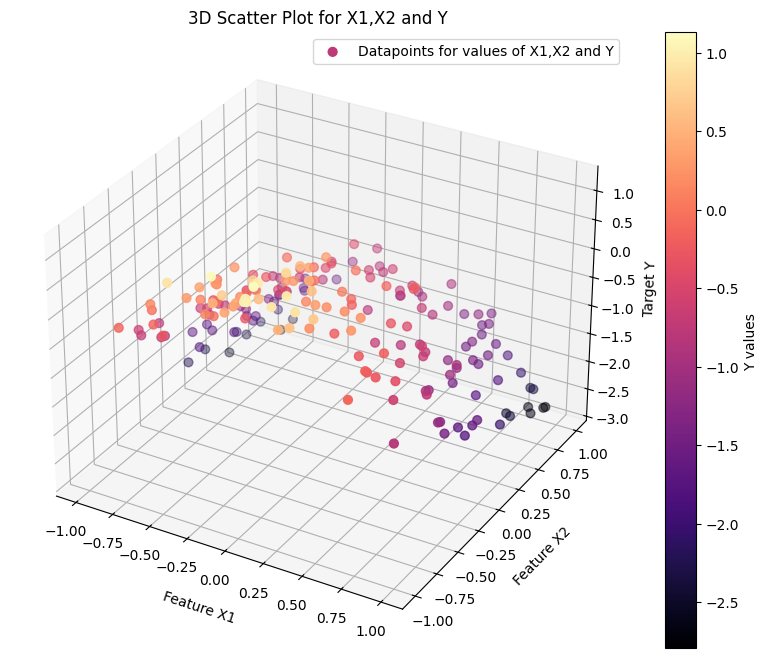

In [1100]:
#As given this is a 3d plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #i need this for 3d plotting

fig = plt.figure(figsize = (10,8))
fig.tight_layout()


ax = fig.add_subplot(111,projection="3d" )


chart = ax.scatter(X[:,0],X[:,1],y,c=y,cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")
ax.set_title("3D Scatter Plot for X1,X2 and Y")
ax.set_xlabel("Feature X1",size=10,labelpad=8)
ax.set_ylabel("Feature X2",size=10,labelpad=8)
ax.set_zlabel("Target Y",labelpad=5,size=10) # labelpad just to allign how close or far i want the lable sot be for clear visibility

cbar = plt.colorbar(chart, ax=ax, shrink=1)
cbar.set_label("Y values ")
plt.legend()
plt.show()

# plt.zlabel("Y") there is no zlable due to which we have to try another approach


So here i do see a curvature but it will be more convenient to use matplotlib to change the viweing angle to confirm if it is actually a curavture or not. For this I am going to use ax.view_init and experiment it with some values to find the correct supporting value that proves that it is a curvature

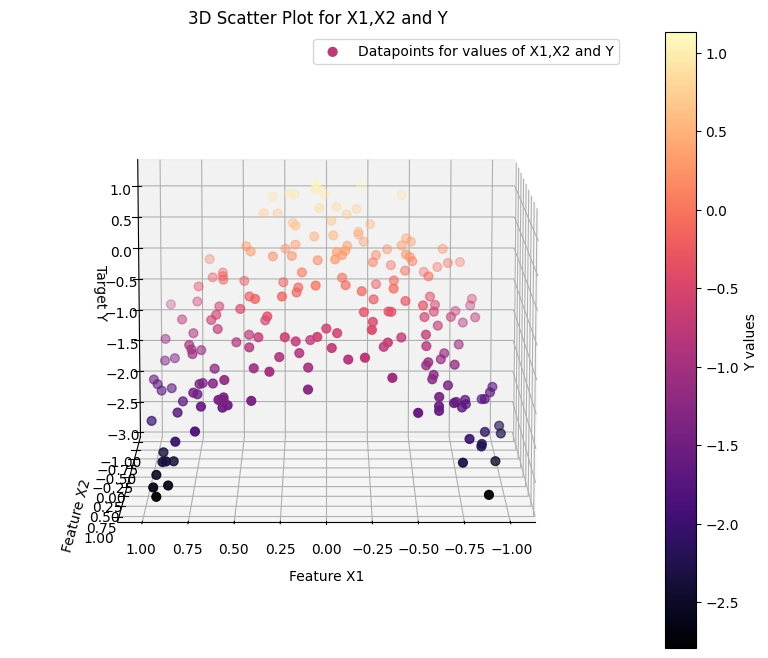

In [1101]:
#As given this is a 3d plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #i need this for 3d plotting

fig = plt.figure(figsize = (10,8))
fig.tight_layout()


ax = fig.add_subplot(111,projection="3d" )
ax.view_init(elev=10, azim=90)

chart = ax.scatter(X[:,0],X[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")
ax.set_title("3D Scatter Plot for X1,X2 and Y")
ax.set_xlabel("Feature X1",size=10,labelpad=10)
ax.set_ylabel("Feature X2",size=10,labelpad=10)
ax.set_zlabel("Target Y",labelpad=5,size=10) # labelpad just to allign how close or far i want the lable sot be for clear visibility

cbar = plt.colorbar(chart, ax=ax, shrink=1)
cbar.set_label("Y values ")

plt.legend()
plt.show()

# plt.zlabel("Y") there is no zlable due to which we have to try another approach


Now we clearly see the curvature that we were referring to previously and by changing dimensions everything seems easy to interpret.

In addition to the two features in the data file add extra polynomial features
equal to all combinations of powers of the two features up to power 5 (you
can use the sklearn PolynomialFeatures function to do this). Now train Lasso
regression models with these polynomial features for a large range of values of
C e.g. 1, 10, 1000 (you might need to adjust these values for your data, start
by making C small enough that the trained model has all parameters zero, then
increase from there). Report the parameters of the trained models (don’t just
give a list of numbers, say what feature each parameter value corresponds to),
discuss how they change as C is varied.

In [1102]:
# adding extra polynormial feature 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

polynomial = PolynomialFeatures(degree=5, include_bias=False) #degree 5 is mentioned in the assignment so therefore we will take degree 5
X_pol = polynomial.fit_transform(X) 

# if i have x1, x2 and then it generates x1,x2,x1x2,x1^2---- and so on for degree =5 
# ive kept include_bias as false to avoid adding 1 constant 
#after this X_multi has 21 features
features = polynomial.get_feature_names_out(['x1','x2'])
print("Features types :", polynomial.get_feature_names_out(['x1','x2'])) #ive added explicitly x1 and x2 because otherwise it will show entries for x0 and x1 by default
print("Number of features now : ", len(features))
scaler = StandardScaler()
X_multi = scaler.fit_transform(X_pol)


Features types : ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2' 'x1^3' 'x1^2 x2' 'x1 x2^2' 'x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2'
 'x1^2 x2^3' 'x1 x2^4' 'x2^5']
Number of features now :  20


In [1103]:
from sklearn.linear_model import Lasso

#Here we will try to get a high level understanding of what all values we will take into consideration and will explore further

find_C = np.logspace(-2, 4, 20)  #couldve used linspace but this gives better range of values to get diverse data

results = []

"""I will run a loop over all values of C and in every iteration
1. C value
2. non zero coefficients --> so if you get nonzero as 0 in simple words it means all coefficients are 0
3. lets print intercept value it will help us understand how it behaves

"""
for C in find_C:
    alpha = 1/(2*C)

    model_all = Lasso(alpha=alpha)
    model_all.fit(X_multi, y)

    coef_all = model_all.coef_
    nonzero = np.sum(np.abs(coef_all) != 0) #to capture all non zero we will use absolute value of coeff

    # I want to store data C, nonzero and intercept so i can do in a list but better option will be dict
    # I can simply convert this into a df and print so its conveninet to convert
    results.append({'C': C, 'Nonzero cols': int(nonzero), 'Intercept': float(model_all.intercept_)})

df = pd.DataFrame(results)
print(df)

               C  Nonzero cols  Intercept
0       0.010000             0  -0.684633
1       0.020691             0  -0.684633
2       0.042813             0  -0.684633
3       0.088587             0  -0.684633
4       0.183298             0  -0.684633
5       0.379269             0  -0.684633
6       0.784760             2  -0.684633
7       1.623777             2  -0.684633
8       3.359818             2  -0.684633
9       6.951928             3  -0.684633
10     14.384499             3  -0.684633
11     29.763514             4  -0.684633
12     61.584821             7  -0.684633
13    127.427499             9  -0.684633
14    263.665090            14  -0.684633
15    545.559478            16  -0.684633
16   1128.837892            20  -0.684633
17   2335.721469            20  -0.684633
18   4832.930239            20  -0.684633
19  10000.000000            20  -0.684633


In [1104]:
# from previous observation it is clear that C=0.3 to 0.7 (so i chose 0.5) is the point where achieve our maximum regularization and after that point all lower C values will have same values and will have all coeff 0

C=0.5 #regularization
a = 1/(2*C) #formula

model_05 = Lasso(alpha=a)
model_05.fit(X_multi,y)

print("Intercept value for C=0.5 is : ", model_05.intercept_)


for name,coef in zip(features,model_05.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=0.5 is :  -0.6846326962439837
x1: -0.0
x2: -0.0
x1^2: -0.0
x1 x2: -0.0
x2^2: 0.0
x1^3: -0.0
x1^2 x2: -0.0
x1 x2^2: -0.0
x2^3: -0.0
x1^4: -0.0
x1^3 x2: -0.0
x1^2 x2^2: -0.0
x1 x2^3: -0.0
x2^4: 0.0
x1^5: -0.0
x1^4 x2: -0.0
x1^3 x2^2: -0.0
x1^2 x2^3: -0.0
x1 x2^4: -0.0
x2^5: -0.0


In [1105]:
from sklearn.linear_model import Lasso

C=1 #regularization
a = 1/(2*C) #formula

model_1 = Lasso(alpha=a)
model_1.fit(X_multi,y)

print("Intercept value for C=1 is : ", model_1.intercept_)


for name,coef in zip(features,model_1.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1 is :  -0.6846326962439837
x1: -0.0
x2: -0.1640012791766632
x1^2: -0.1688353606890876
x1 x2: -0.0
x2^2: 0.0
x1^3: -0.0
x1^2 x2: -0.0
x1 x2^2: -0.0
x2^3: -0.0
x1^4: -0.0
x1^3 x2: -0.0
x1^2 x2^2: -0.0
x1 x2^3: -0.0
x2^4: 0.0
x1^5: -0.0
x1^4 x2: -0.0
x1^3 x2^2: -0.0
x1^2 x2^3: -0.0
x1 x2^4: -0.0
x2^5: -0.0


In [1106]:
from sklearn.linear_model import Lasso

C=10 #regularization
a = 1/(2*C) #formula

model_10= Lasso(alpha=a)
model_10.fit(X_multi,y)

print("Intercept value for C=10 is : ", model_10.intercept_)

for name,coef in zip(features,model_10.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=10 is :  -0.6846326962439838
x1: -0.0
x2: -0.5260382712385637
x1^2: -0.5388777474605291
x1 x2: 0.0
x2^2: 0.0
x1^3: 0.0
x1^2 x2: -0.0
x1 x2^2: -0.0
x2^3: -0.0
x1^4: -0.0
x1^3 x2: 0.0
x1^2 x2^2: -0.0
x1 x2^3: 0.0
x2^4: 0.0
x1^5: 0.0
x1^4 x2: -0.019504465626155827
x1^3 x2^2: -0.0
x1^2 x2^3: -0.0
x1 x2^4: -0.0
x2^5: -0.0


In [1107]:
from sklearn.linear_model import Lasso

C=1000 #regularization
a = 1/(2*C) #formula

model_1000 = Lasso(alpha=a)
model_1000.fit(X_multi,y)


print("Intercept value for C=1000 is : ", model_1000.intercept_)
for name,coef in zip(features,model_1000.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1000 is :  -0.6846326962439839
x1: -0.07170078154135402
x2: -0.540125122855442
x1^2: -0.5703120207614764
x1 x2: -0.0623496498961888
x2^2: -0.048489473970023546
x1^3: 0.06239000195523282
x1^2 x2: 0.02123246301494264
x1 x2^2: 0.07027067722795137
x2^3: -0.0044212946903970304
x1^4: 0.001484404838526442
x1^3 x2: 0.07194383032166687
x1^2 x2^2: -0.013467455270737432
x1 x2^3: 0.026217048997863337
x2^4: 0.05685529113582535
x1^5: -0.0
x1^4 x2: -0.10062446653907076
x1^3 x2^2: -0.035357333301228686
x1^2 x2^3: 0.03541788697923077
x1 x2^4: -0.03238136763162058
x2^5: -0.021625126006494102


In [1108]:
from sklearn.linear_model import Lasso

C=1128 #regularization
a = 1/(2*C) #formula

model_1128 = Lasso(alpha=a)
model_1128.fit(X_multi,y)

print("Intercept value for C=1128 is : ", model_1128.intercept_)
for name,coef in zip(features,model_1128.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1128 is :  -0.6846326962439839
x1: -0.0773882637732554
x2: -0.5411335499073391
x1^2: -0.5730521347102452
x1 x2: -0.06510995817420849
x2^2: -0.05021132410166122
x1^3: 0.06963510851144777
x1^2 x2: 0.026138887989755787
x1 x2^2: 0.07798062239280328
x2^3: -0.005280049167673004
x1^4: 0.003988797629039
x1^3 x2: 0.07392367228952591
x1^2 x2^2: -0.01234734632592725
x1 x2^3: 0.02768963217786224
x2^4: 0.05805622290936021
x1^5: -0.0025629941936528623
x1^4 x2: -0.10456781205443212
x1^3 x2^2: -0.039637006559492614
x1^2 x2^3: 0.034595255874539516
x1 x2^4: -0.03590781831901299
x2^5: -0.020681752863155482


For each of the models from (b) generate predictions for the target variable.
Generate these predictions on a grid of feature values. You can use a couple of
nested for loops for this 

This grid should extend beyond the range of values in the dataset e.g. if the
first feature in the dataset has values from 0 to 2 generate predictions for values
from -5 to 5 or thereabouts. Plot these predictions on a 3D data plot and also
show the training data. Adjust the grid range used for the predictions so that the
training data can still be clearly seen in the plot. Its up to you to decide how best
to plot this data but do try to make your plot easy to read (suggestion: it can
be helpful to plot the predictions as a surface using the matplotlib plot surface
command and the training data as points using the matplotlib scatter command,
be sure to add a legend to identify the different curves). With reference to this
plot discuss how the predictions change as C is varied

In [1109]:
#to find out linspace we find out min and max in X1 and X2 and y
#Primarily we have to find out RANGE OF OUR DATA
print("Min value for X1 : ", X_multi[:,0].min())
print("Max value for X1 : ", X_multi[:,0].max())
print("Min value for X2 : ", X_multi[:,1].min())
print("Max value for X2 : ", X_multi[:,1].max())

Min value for X1 :  -1.7157996540241478
Max value for X1 :  1.7007122707716613
Min value for X2 :  -1.8026944582155384
Max value for X2 :  1.669846802597456


check here and see x1, x2 is grid only how it is poissible ?


In [1110]:
grid = np.linspace(-5, 5,100) #only 50 by default 
print("Elements in grid :", np.size(grid))
print("Shape of Grid :",grid.shape)


X1_mesh, X2_mesh = np.meshgrid(grid,grid) #takes 1d array and makes 2d matrix
# X1_mesh and X2_mesh = grid * grid
print("Size of X1_mesh :" ,np.size(X1_mesh))
print("Shape of X1_mesh :",X1_mesh.shape)

print("Size of X2_mesh :" ,np.size(X2_mesh))
print("Shape of X2_mesh :",X2_mesh.shape)

Xtest = np.column_stack([X1_mesh.ravel(), X2_mesh.ravel()]) #Flatten the data
print("Shape of Xtest :",Xtest.shape)


Elements in grid : 100
Shape of Grid : (100,)
Size of X1_mesh : 10000
Shape of X1_mesh : (100, 100)
Size of X2_mesh : 10000
Shape of X2_mesh : (100, 100)
Shape of Xtest : (10000, 2)


In [1111]:
# our model was trained on polynomial features so we will transform the grid in same way
Xtest_multiple = polynomial.transform(Xtest)
#print("Shape of Xtest :",Xtest_multiple.shape)


In [1112]:
y_pred_05 = model_05.predict(Xtest_multiple)
Y_pred_mesh05 = y_pred_05.reshape(X1_mesh.shape)

y_pred_1 = model_1.predict(Xtest_multiple)
Y_pred_mesh1 = y_pred_1.reshape(X1_mesh.shape)

y_pred_10 = model_10.predict(Xtest_multiple)
Y_pred_mesh10 = y_pred_10.reshape(X1_mesh.shape)

y_pred_1000 = model_1000.predict(Xtest_multiple)
Y_pred_mesh1000 = y_pred_1000.reshape(X1_mesh.shape)

y_pred_1128 = model_1128.predict(Xtest_multiple)
Y_pred_mesh1128 = y_pred_1128.reshape(X1_mesh.shape)

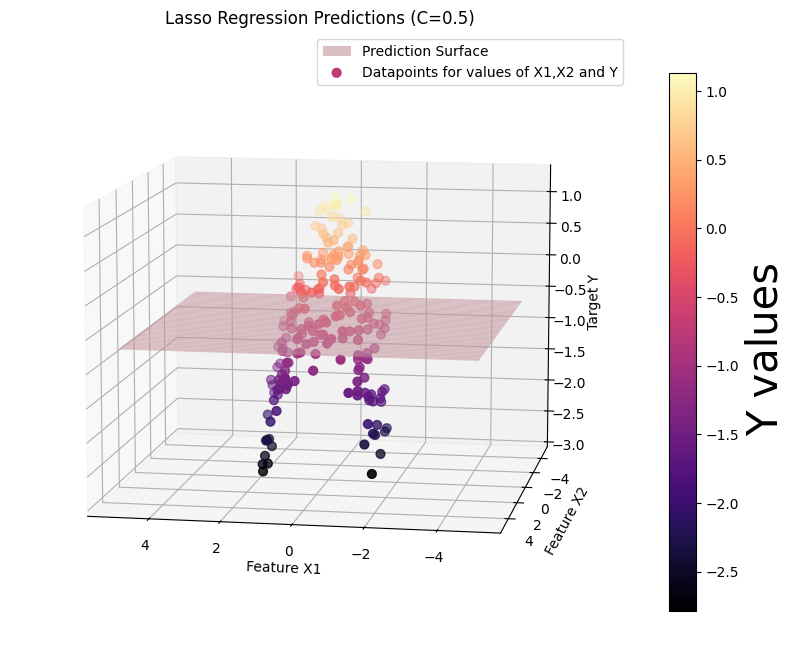

In [1137]:
C=0.5
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#For C=0.5 we have y_pred_mesh05 which was trained on model1 Lasso
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_mesh05, color='pink', alpha=0.6, label='Prediction Surface')


#ax.scatter(X[:, 0], X[:, 1], y, color='red', s=20, label='Training Data') This is also working but the only issue to analyse the depth of the points so i have commented this out
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

# here we are using x because x_multi has 21 features but its not required as the plot is only between X1 and X2.
cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)

ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')
ax.view_init(elev=10, azim=100)


plt.legend()
plt.show()

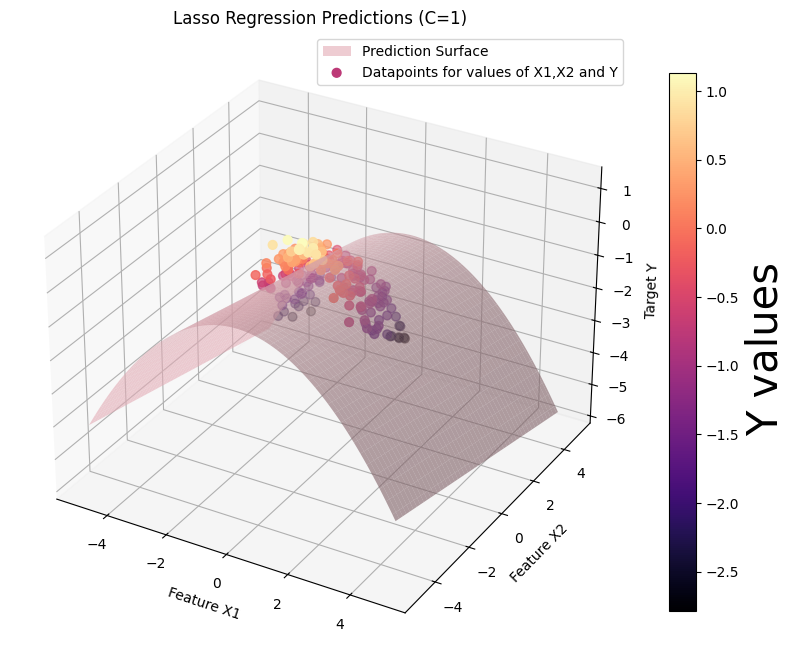

In [1136]:
C=1
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#For C=1 we have y_pred_mesh1 which was trained on model1 Lasso
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_mesh1, color='pink', alpha=0.6, label='Prediction Surface')


#ax.scatter(X[:, 0], X[:, 1], y, color='red', s=20, label='Training Data') This is also working but the only issue to analyse the depth of the points so i have commented this out
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

# here we are using x because x_multi has 21 features but its not required as the plot is only between X1 and X2.
cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)

ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')
"""ax.view_init(elev=0,azim=100)
"""

plt.legend()
plt.show()


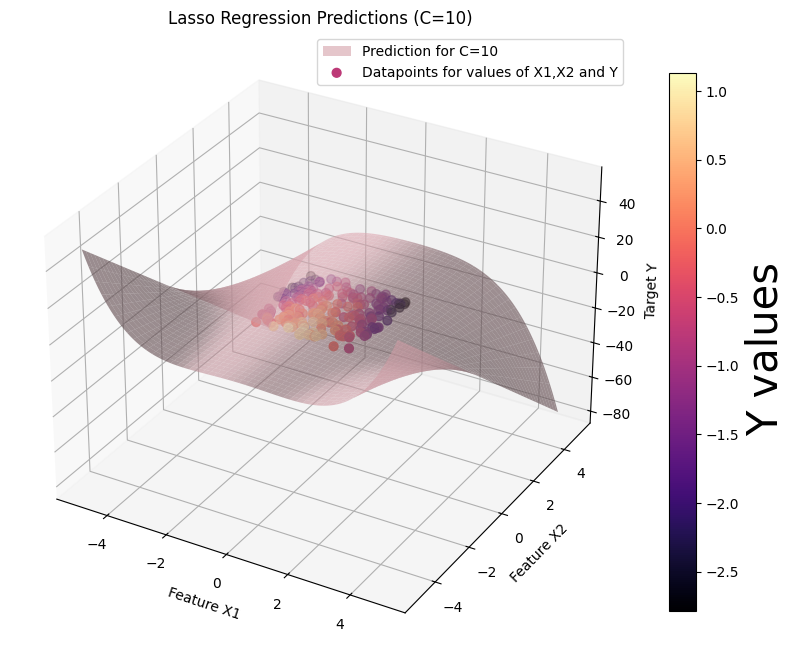

In [1115]:
C=10

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#Here ive used Y_pred_mesh10 which is trained on model10 on lasso
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh10, color="pink",alpha=0.6, label="Prediction for C=10")


#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')

plt.legend()
plt.show()

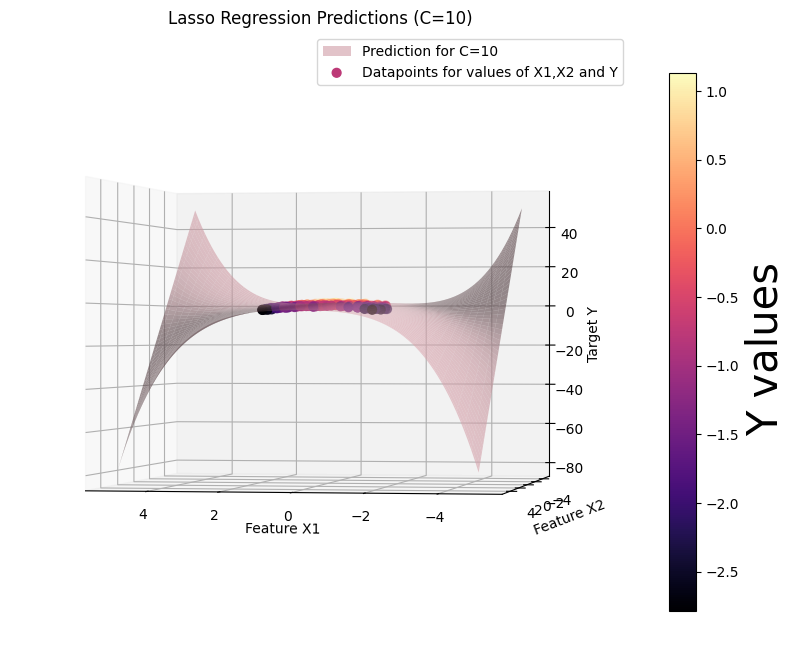

In [1116]:
C=10

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#Here ive used Y_pred_mesh10 which is trained on model10 on lasso
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh10, color="pink",alpha=0.6, label="Prediction for C=10")


#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)

ax.view_init(elev=0,azim=100)
ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')

plt.legend()
plt.show()

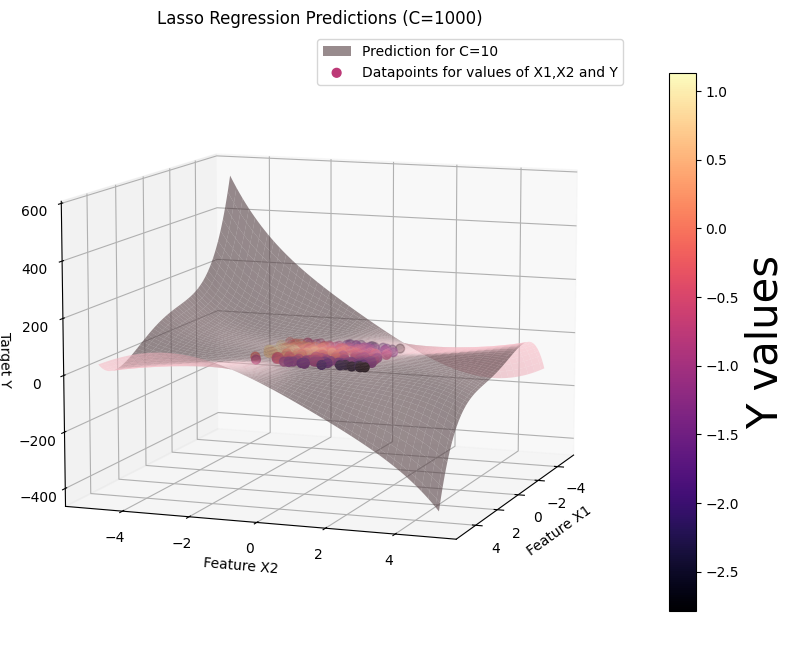

In [1117]:
C=1000

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#Here the Y_pred_mesh1000 is being trained on model1000 on Lasso
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh1000, color="pink",alpha=0.6, label="Prediction for C=10")


#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values",size=30)
ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')
ax.view_init(elev=10, azim=20)

plt.legend()
plt.show()

Im not able to see the wobbly surface plot therefore lets change the elev and azim value --> veiw_init

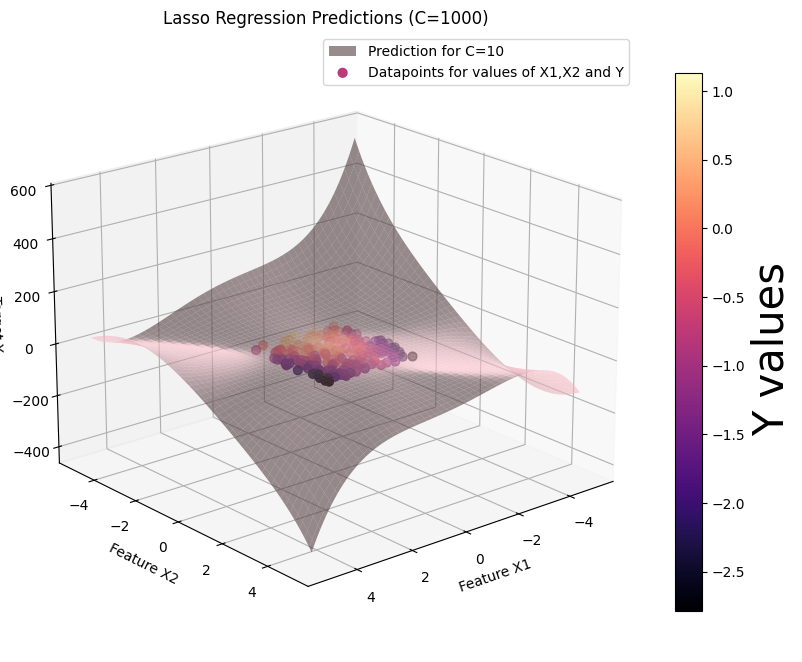

In [1118]:
# This is for better visualisation of C=1000

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

# here C=1000 therefore Y_pred_mesh1000
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh1000, color="pink",alpha=0.6, label="Prediction for C=10")

#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')
ax.view_init(elev=20, azim=50)

plt.legend()
plt.show()

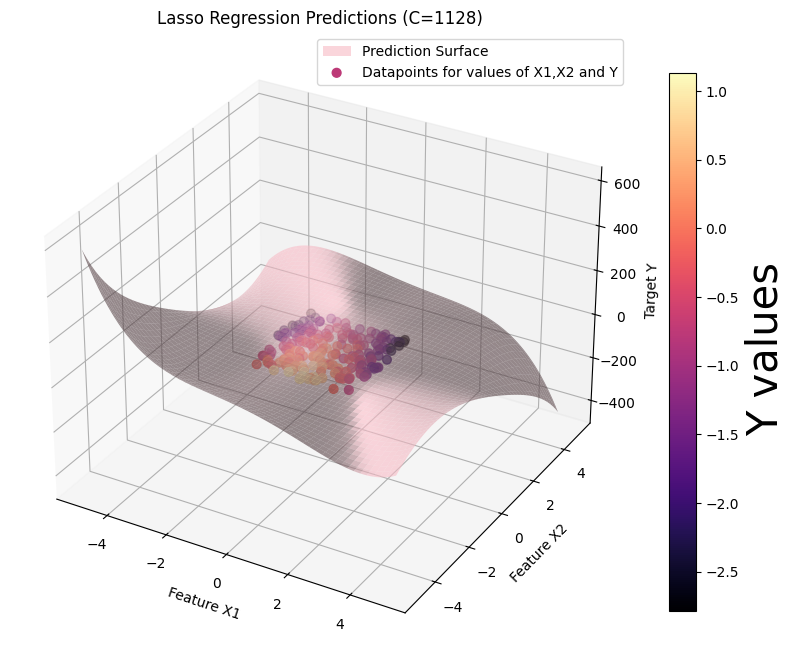

In [1138]:
C=1128
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection="3d")

#For C=1128 we have y_pred_mesh1 which was trained on model1 Lasso
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_mesh1128, color='pink', alpha=0.6, label='Prediction Surface')


#ax.scatter(X[:, 0], X[:, 1], y, color='red', s=20, label='Training Data') This is also working but the only issue to analyse the depth of the points so i have commented this out
chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

# here we are using x because x_multi has 21 features but its not required as the plot is only between X1 and X2.
cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel('Feature X1',size=10)
ax.set_ylabel('Feature X2',size=10)
ax.set_zlabel('Target Y',size=10)
ax.set_title(f'Lasso Regression Predictions (C={C})')


plt.legend()
plt.show()

(d) What is under- and over-fitting? Using your parameter data from (b) and vi-
sualisation from (c) explain how penalty weight parameter C can be used to
manage to trade-off between under- and over-fitting the data.

(e)Repeat (b)-(c) for a Ridge Regression model. This uses an L2 penalty instead of
an L1 penalty in the cost function. Compare the impact on the model parameters
of changing C with Lasso Regression and with Ridge Regression.

In [1120]:
from sklearn.linear_model import Ridge
C=0.5 #regularization
a = 1/(2*C) #formula
model_05r= Ridge(alpha=a)
model_05r.fit(X_multi,y)
print("Intercept value for C=0.5 is : ", model_05r.intercept_)

for name,coef in zip(features,model_05r.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=0.5 is :  -0.6846326962439839
x1: -0.08765149628339264
x2: -0.49746233779584625
x1^2: -0.5457266315998517
x1 x2: -0.06621665907082608
x2^2: -0.049326194553347594
x1^3: 0.09397996494003069
x1^2 x2: -0.0017437555894353383
x1 x2^2: 0.08476231435260119
x2^3: -0.07770931746222702
x1^4: -0.018642388451359605
x1^3 x2: 0.07392732977867479
x1^2 x2^2: -0.019663996473795214
x1 x2^3: 0.028658693743473698
x2^4: 0.061078959344952534
x1^5: -0.018482777818034445
x1^4 x2: -0.09753682061111318
x1^3 x2^2: -0.04006802314960642
x1^2 x2^3: 0.05509049418980127
x1 x2^4: -0.040651644148309476
x2^5: 0.012775839857564813


In [1121]:
from sklearn.linear_model import Ridge
C=1 #regularization
a = 1/(2*C) #formula
model_1r= Ridge(alpha=a)
model_1r.fit(X_multi,y)
print("Intercept value for C=1 is : ", model_1r.intercept_)

for name,coef in zip(features,model_1r.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1 is :  -0.6846326962439839
x1: -0.10933218241523317
x2: -0.5158231126370812
x1^2: -0.5685052535946965
x1 x2: -0.07560689269884788
x2^2: -0.05565543882715003
x1^3: 0.1388558192437587
x1^2 x2: 0.024010252227220325
x1 x2^2: 0.10127529134225662
x2^3: -0.056954189189444206
x1^4: 0.0012701511414989046
x1^3 x2: 0.08163574352541969
x1^2 x2^2: -0.01221131845097038
x1 x2^3: 0.03273938070951607
x2^4: 0.06366767839453703
x1^5: -0.044645361243917735
x1^4 x2: -0.11404219488616138
x1^3 x2^2: -0.05329628809458034
x1^2 x2^3: 0.04636008298041843
x1 x2^4: -0.04624441655458858
x2^5: 0.005468669763577511


In [1122]:
C=10 #regularization
a = 1/(2*C) #formula
model_10r= Ridge(alpha=a)
model_10r.fit(X_multi,y)
print("Intercept value for C=10 is : ", model_10r.intercept_)

for name,coef in zip(features,model_10r.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=10 is :  -0.6846326962439839
x1: -0.15101792712013634
x2: -0.5421190971409883
x1^2: -0.5953848741839796
x1 x2: -0.08924194514044301
x2^2: -0.06289245987438412
x1^3: 0.23308609102730965
x1^2 x2: 0.05739571145006146
x1 x2^2: 0.12335925460814846
x2^3: -0.018532751164076346
x1^4: 0.025172489211297337
x1^3 x2: 0.09316671922686763
x1^2 x2^2: -0.0025823959834956967
x1 x2^3: 0.03829254484911573
x2^4: 0.06647647529585453
x1^5: -0.10172721946736797
x1^4 x2: -0.1354101061756747
x1^3 x2^2: -0.07445573132844138
x1^2 x2^3: 0.03448284829519199
x1 x2^4: -0.051287947364519984
x2^5: -0.013057082346022935


In [1123]:
C=1000 #regularization
a = 1/(2*C) #formula
model_1000r= Ridge(alpha=a)
model_1000r.fit(X_multi,y)
print("Intercept value for C=1000 is : ", model_1000r.intercept_)

for name,coef in zip(features,model_10r.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1000 is :  -0.6846326962439839
x1: -0.15101792712013634
x2: -0.5421190971409883
x1^2: -0.5953848741839796
x1 x2: -0.08924194514044301
x2^2: -0.06289245987438412
x1^3: 0.23308609102730965
x1^2 x2: 0.05739571145006146
x1 x2^2: 0.12335925460814846
x2^3: -0.018532751164076346
x1^4: 0.025172489211297337
x1^3 x2: 0.09316671922686763
x1^2 x2^2: -0.0025823959834956967
x1 x2^3: 0.03829254484911573
x2^4: 0.06647647529585453
x1^5: -0.10172721946736797
x1^4 x2: -0.1354101061756747
x1^3 x2^2: -0.07445573132844138
x1^2 x2^3: 0.03448284829519199
x1 x2^4: -0.051287947364519984
x2^5: -0.013057082346022935


In [1124]:
from sklearn.linear_model import Ridge
C=1128 #regularization
a = 1/(2*C) #formula
model_1128r= Ridge(alpha=a)
model_1128r.fit(X_multi,y)
print("Intercept value for C=1128 is : ", model_1128r.intercept_)

for name,coef in zip(features,model_1128r.coef_):
    print(f"{name:}: {coef:}")

Intercept value for C=1128 is :  -0.6846326962439839
x1: -0.15866437329827734
x2: -0.5461100322902632
x1^2: -0.5990069870171084
x1 x2: -0.0913642111929953
x2^2: -0.0638232644494361
x1^3: 0.25105665561774687
x1^2 x2: 0.061980270998373284
x1 x2^2: 0.12656919788105483
x2^3: -0.011820462492642377
x1^4: 0.028435124347566364
x1^3 x2: 0.09499289720303913
x1^2 x2^2: -0.0011986565259658611
x1 x2^3: 0.039110992690867256
x2^4: 0.06681355754009957
x1^5: -0.1127806437534461
x1^4 x2: -0.13835020933472317
x1^3 x2^2: -0.07798703074491026
x1^2 x2^3: 0.032797481765797304
x1 x2^4: -0.05169905880643905
x2^5: -0.01668154553913494


In [1125]:
y_pred_05r = model_05r.predict(Xtest_multiple)
Y_pred_mesh05r = y_pred_05r.reshape(X1_mesh.shape)

y_pred_1r = model_1r.predict(Xtest_multiple)
Y_pred_mesh1r = y_pred_1r.reshape(X1_mesh.shape)

y_pred_10r = model_10r.predict(Xtest_multiple)
Y_pred_mesh10r = y_pred_10r.reshape(X1_mesh.shape)

y_pred_1000r = model_1000r.predict(Xtest_multiple)
Y_pred_mesh1000r = y_pred_1000r.reshape(X1_mesh.shape)

y_pred_1128r = model_1128r.predict(Xtest_multiple)
Y_pred_mesh1128r = y_pred_1128r.reshape(X1_mesh.shape)

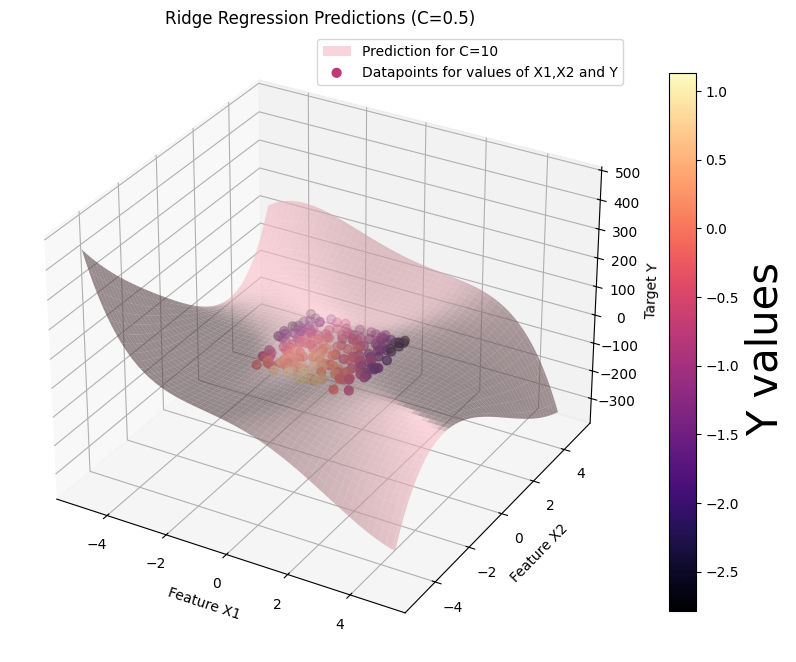

In [1126]:
fig = plt.figure(figsize=(10,10))
C=0.5

ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh05r, color="pink",alpha=0.6, label="Prediction for C=10")
#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")

chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title(f'Ridge Regression Predictions (C={C})')

plt.legend()
plt.show()

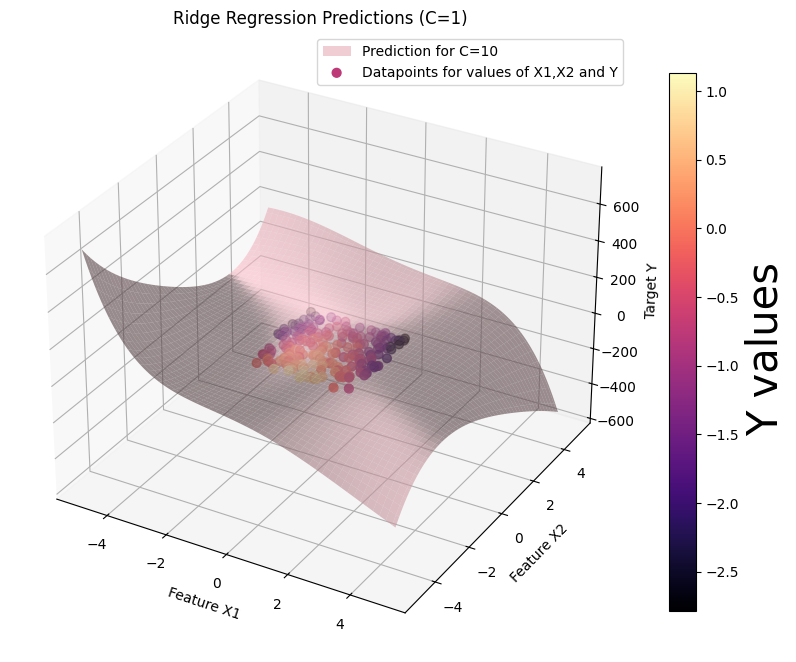

In [1127]:
fig = plt.figure(figsize=(10,10))
C=1

ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh1r, color="pink",alpha=0.6, label="Prediction for C=10")
#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")

chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title(f'Ridge Regression Predictions (C={C})')

plt.legend()
plt.show()

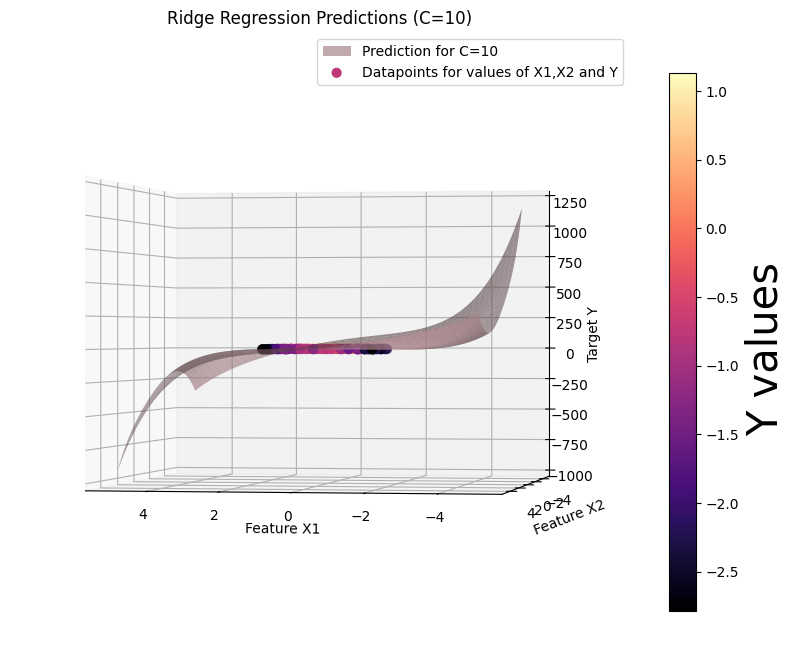

In [1128]:
fig = plt.figure(figsize=(10,10))
C=10

ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh10r, color="pink",alpha=0.6, label="Prediction for C=10")
#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")

chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title(f'Ridge Regression Predictions (C={C})')
ax.view_init(elev=0, azim=100)


plt.legend()
plt.show()

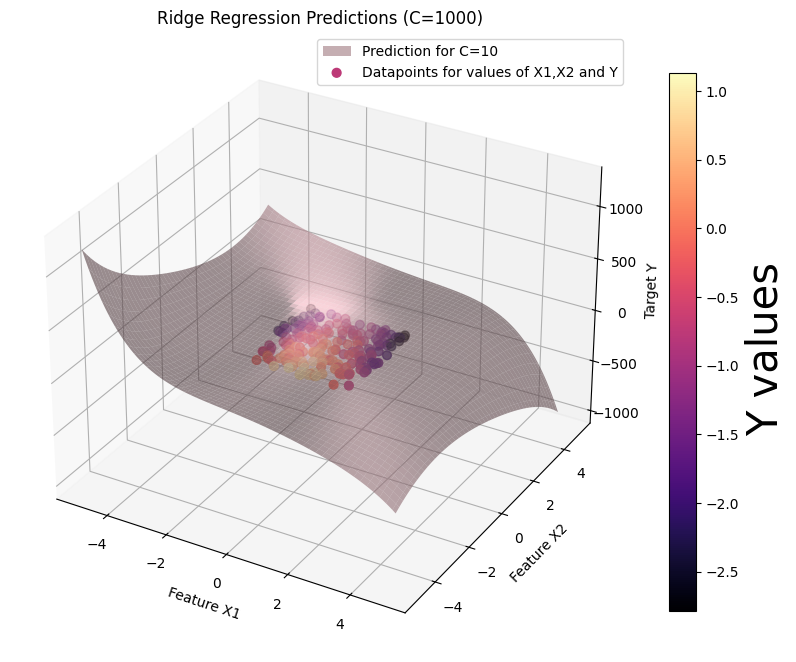

In [1129]:
fig = plt.figure(figsize=(10,10))
C=1000

ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh1000r, color="pink",alpha=0.6, label="Prediction for C=10")
#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")

chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title(f'Ridge Regression Predictions (C={C})')
#ax.view_init(elev=0, azim=100)


plt.legend()
plt.show()

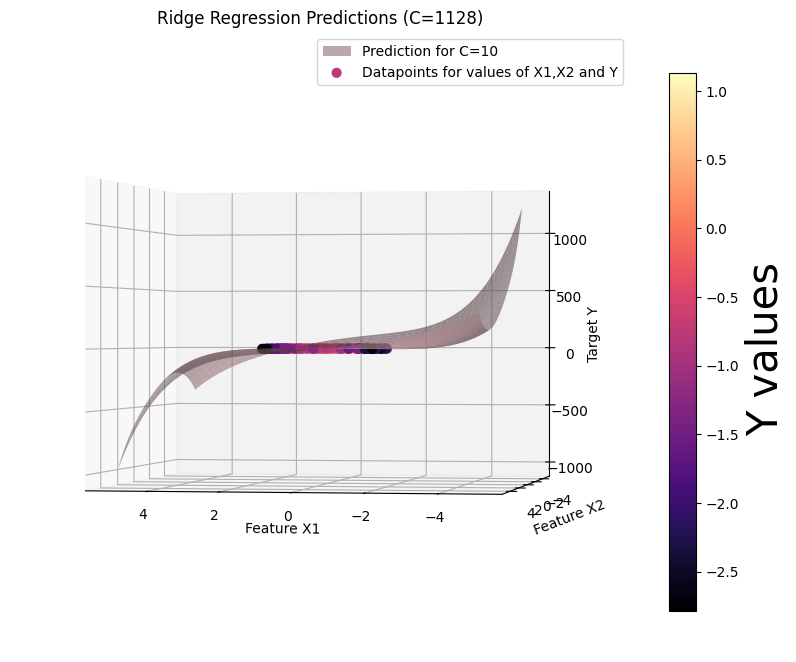

In [1130]:
fig = plt.figure(figsize=(10,10))
C=1128

ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(X1_mesh,X2_mesh,Y_pred_mesh1128r, color="pink",alpha=0.6, label="Prediction for C=10")
#ax.scatter(X[:, 0], X[:, 1],y, color="red",s=40,label="Training Data")

chart = ax.scatter(X_multi[:,0],X_multi[:,1],y,c=y, cmap="magma", marker="o",s=40, label="Datapoints for values of X1,X2 and Y")

cbar = plt.colorbar(chart, ax=ax, shrink=0.70)
cbar.set_label("Y values ",size=30)
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target Y")
ax.set_title(f'Ridge Regression Predictions (C={C})')
ax.view_init(elev=0, azim=100)


plt.legend()
plt.show()

(ii) Using the Lasso model with polynomial features from (i) you’ll now look at using
cross-validation to select C.
(a) Use 5-fold cross-validation to plot the mean and standard deviation of the pre-
diction error vs C. Use the matplotlib errorbar function for this. You will need
to choose the range of values of C to plot, justify your choice.

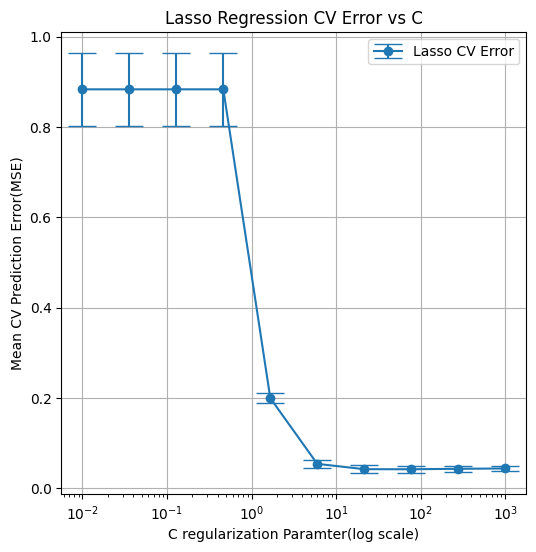

In [1131]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Let us specify what will be our values of C
all_C = np.logspace(-2,3,10) #this means that from logaithmically 10^-2 to 10^3 we have to find 10 numbers 
#why logarithmic now this will give us better coverage of small to learge values

# we will be looping over different values of c therefore we will store observations in this and print them in end 
mean_of_mse = []
strd_mse = []

for c in all_C:

    #l1 penalty or alpha
    alpha = 1/(2*c) #this is exact formula of sklearn alpha value
    #in our model we have used C so we need this because in Lasso we cant pass C we need to pass alpha

    model_lasso1 = Lasso(alpha=alpha, max_iter=10000) #max_iter are 10000 because remeber the new x_mutliple has very high number of features so it requires mutliple iterations to converge we dont want to fall short
    scores = -cross_val_score(model_lasso1, X_multi, y, scoring='neg_mean_squared_error', cv=5)
    #cross validation scores will divide the model into variable test and train split and every time train itself on the training data
    mean_of_mse.append(scores.mean())
    strd_mse.append(scores.std())
    # for 1 loop over C=1 i get 5 values so instead of storing them separately i will just take mean and standard for all values of C



plt.figure(figsize=(6,6))
plt.errorbar(all_C, mean_of_mse, yerr=strd_mse, marker="o", capsize=10, label="Lasso CV Error")
plt.xscale('log') #sets x axis to logarithmic scale

plt.xlabel("C regularization Paramter(log scale)")
plt.ylabel("Mean CV Prediction Error(MSE)")
plt.title("Lasso Regression CV Error vs C")
plt.grid(True)

plt.legend()
plt.show()

(b) Based on the cross-validation data what value of C would you recommend be
used here? Importantly, explain the reasons for your choice.


(c) Repeat (b)-(c) for a Ridge Regression model.

In [1132]:
from sklearn.linear_model import Ridge
mean_of_mse_ridge=[]
strd_mse_ridge=[]

c_val_ridge=np.logspace(-7,1,10)

for c in c_val_ridge:
    alpha = 1/(2*c)
    model_ridge = Ridge(alpha=alpha)
    scores = -cross_val_score(model_ridge,X_multi,y,scoring="neg_mean_squared_error",cv=5)
    mean_of_mse_ridge.append(scores.mean())
    strd_mse_ridge.append(scores.std())

# This is for visual comparison between Lasso and Ridge but not required
"""mean_of_mse1=[]
strd_mse1=[]

for c in c_val_ridge:

    #l1 penalty or alpha
    alpha = 1/(2*c) #this is exact formula of sklearn alpha value
    #in our model we have used C so we need this because in Lasso we cant pass C we need to pass alpha

    model_lasso1_compare = Lasso(alpha=alpha, max_iter=10000) #max_iter are 10000 because remeber the new x_mutliple has very high number of features so it requires mutliple iterations to converge we dont want to fall short
    scores = -cross_val_score(model_lasso1_compare, X_multi, y, scoring='neg_mean_squared_error', cv=5)
    #cross validation scores will divide the model into variable test and train split and every time train itself on the training data
    mean_of_mse1.append(scores.mean())
    strd_mse1.append(scores.std())
    # for 1 loop over C=1 i get 5 values so instead of storing them separately i will just take mean and standard for all values of C
"""

"mean_of_mse1=[]\nstrd_mse1=[]\n\nfor c in c_val_ridge:\n\n    #l1 penalty or alpha\n    alpha = 1/(2*c) #this is exact formula of sklearn alpha value\n    #in our model we have used C so we need this because in Lasso we cant pass C we need to pass alpha\n\n    model_lasso1_compare = Lasso(alpha=alpha, max_iter=10000) #max_iter are 10000 because remeber the new x_mutliple has very high number of features so it requires mutliple iterations to converge we dont want to fall short\n    scores = -cross_val_score(model_lasso1_compare, X_multi, y, scoring='neg_mean_squared_error', cv=5)\n    #cross validation scores will divide the model into variable test and train split and every time train itself on the training data\n    mean_of_mse1.append(scores.mean())\n    strd_mse1.append(scores.std())\n    # for 1 loop over C=1 i get 5 values so instead of storing them separately i will just take mean and standard for all values of C\n"

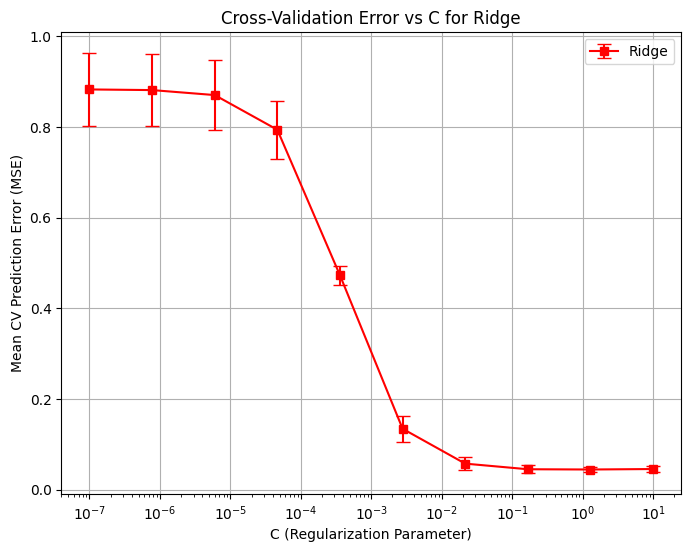

In [1133]:
plt.figure(figsize=(8,6))
#plt.errorbar(c_val_ridge, mean_of_mse1, yerr=strd_mse1, fmt='-o', label='Lasso', capsize=5)
plt.errorbar(c_val_ridge, mean_of_mse_ridge, yerr=strd_mse_ridge, fmt='-s', label='Ridge', capsize=5, color="red")
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean CV Prediction Error (MSE)')
plt.title('Cross-Validation Error vs C for Ridge')
plt.legend()
plt.grid(True)
plt.show()


Just a comparison between same values of C on a ridge and lasso model

In [1134]:
from sklearn.linear_model import Ridge
mean_of_mse_ridge=[]
strd_mse_ridge=[]

c_val_ridge=np.logspace(-7,1,10)

for c in c_val_ridge:
    alpha = 1/(2*c)
    model_ridge = Ridge(alpha=alpha)
    scores = -cross_val_score(model_ridge,X_multi,y,scoring="neg_mean_squared_error",cv=5)
    mean_of_mse_ridge.append(scores.mean())
    strd_mse_ridge.append(scores.std())

# This is for visual comparison between Lasso and Ridge but not required
mean_of_mse1=[]
strd_mse1=[]

for c in c_val_ridge:

    #l1 penalty or alpha
    alpha = 1/(2*c) #this is exact formula of sklearn alpha value
    #in our model we have used C so we need this because in Lasso we cant pass C we need to pass alpha

    model_lasso1_compare = Lasso(alpha=alpha, max_iter=10000) #max_iter are 10000 because remeber the new x_mutliple has very high number of features so it requires mutliple iterations to converge we dont want to fall short
    scores = -cross_val_score(model_lasso1_compare, X_multi, y, scoring='neg_mean_squared_error', cv=5)
    #cross validation scores will divide the model into variable test and train split and every time train itself on the training data
    mean_of_mse1.append(scores.mean())
    strd_mse1.append(scores.std())
    # for 1 loop over C=1 i get 5 values so instead of storing them separately i will just take mean and standard for all values of C


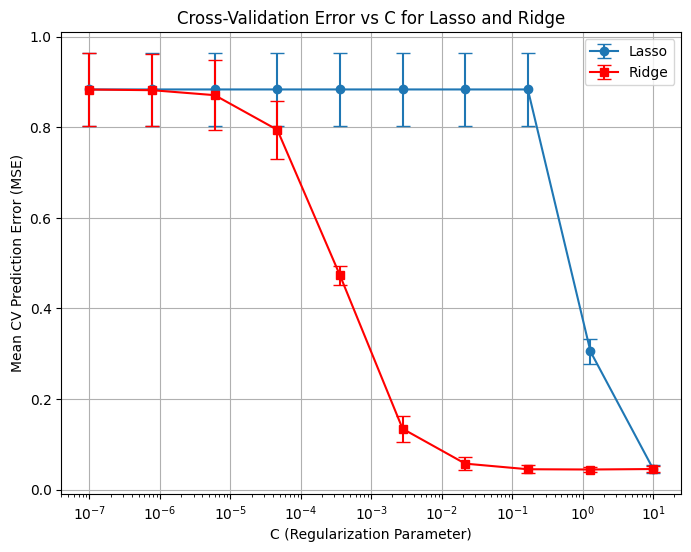

In [1135]:
plt.figure(figsize=(8,6))
plt.errorbar(c_val_ridge, mean_of_mse1, yerr=strd_mse1, fmt='-o', label='Lasso', capsize=5)
plt.errorbar(c_val_ridge, mean_of_mse_ridge, yerr=strd_mse_ridge, fmt='-s', label='Ridge', capsize=5, color="red")
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean CV Prediction Error (MSE)')
plt.title('Cross-Validation Error vs C for Lasso and Ridge')
plt.legend()
plt.grid(True)
plt.show()
